[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mic-73/AI/blob/main/HW5/Problem1.ipynb)

## AUTHOR: Michael Wood
## Purpose: Optimum Design of an I-beam

In [1]:
## Install necessary packages

# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [2]:
## Loading the needed libraries

library(GA)
library(plotly)

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




We start by defining the necessary functions for this problem.


*   f1 = 2$x_{2}$$x_{4}$ + $x_{3}$($x_{1}$ - 2$x_{4}$)
*   f2 = 60000 / ($x_{3}$($x_{1}$ - 2$x_{4}$)$^{3}$ + 2$x_{2}$$x_{4}$[4$x_{4}^{2}$ + 3$x_{1}$($x_{1}$ - 2$x_{4}$)])
*   F = y = a(f1) + b(f2)

With parameter constraints:

*   10 ≤ $x_{1}$ ≤ 80
*   10 ≤ $x_{2}$ ≤ 50
*   0.9 ≤ $x_{3}$ ≤ 5.0
*   0.9 ≤ $x_{4}$ ≤ 5.0
*   The sum of a and b must be 1

In [205]:
## Define Functions

# Parameter constraints
x1 <- seq(10, 80, by = 0.1)
x2 <- seq(10, 50, by = 0.1)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

# f1
func1 <- function(x1, x2, x3, x4)
{
  2*x2*x4 + x3*(x1 - 2*x4)
}

# f2
func2 <- function(x1, x2, x3, x4)
{
  60000 / (x3*(x1 - 2*x4)^3 + 2*x2*x4*(4*x4^2 + 3*x1*(x1 - 2*x4)))
}

# Weights
a <- 0.5
b <- 0.5

# Weighted function y
func3 <- function(a, b, x1, x2, x3, x4, func1, func2) {
  f1 <- func1(x1, x2, x3, x4)
  f2 <- func2(x1, x2, x3, x4)
  a * f1 + b * f2
}


After defining the necessary functions, we will apply the Genetic Algorithm to all of them. Since the goal is to minimize the functions, we will multiple them by -1 in the fitness parameter.

The population parameters:
1. numGenerations=100
2. populationSize=50
3. Pc=0.75
4. Pm=0.001
5. type="real-valued"
6. lower = c(10, 10, 0.9, 0.9)
7. upper = c(80, 50, 5.0, 5.0)

We display the summary and plot of the GA as well. This displays the best and average fitness of each generation of each function as well as the best obtained solution for that particular generation.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -77.77785 
Solution = 
           x1       x2       x3       x4
[1,] 26.29342 22.82527 1.095396 1.126931

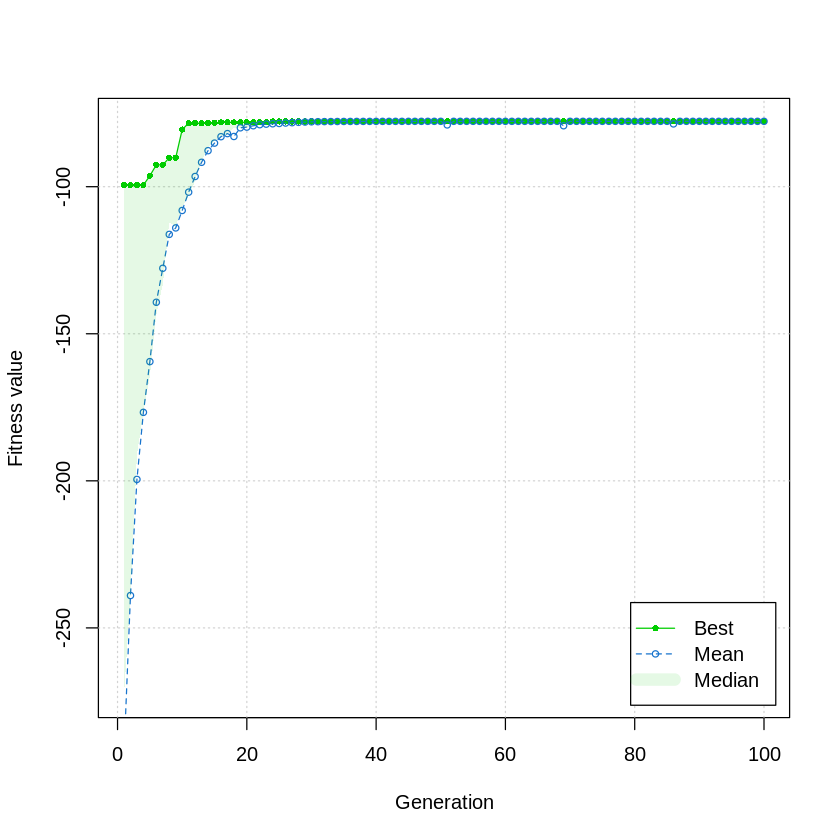

In [231]:
## GA on f1

SGA <- ga(type = "real-valued",
         fitness = function(x) -func1(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

# Summarize GA
summary(SGA)

# Plot GA
plot(SGA)

x.star <- SGA@solution

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.008704259 
Solution = 
           x1       x2      x3       x4
[1,] 78.98041 34.36783 4.76687 4.621957

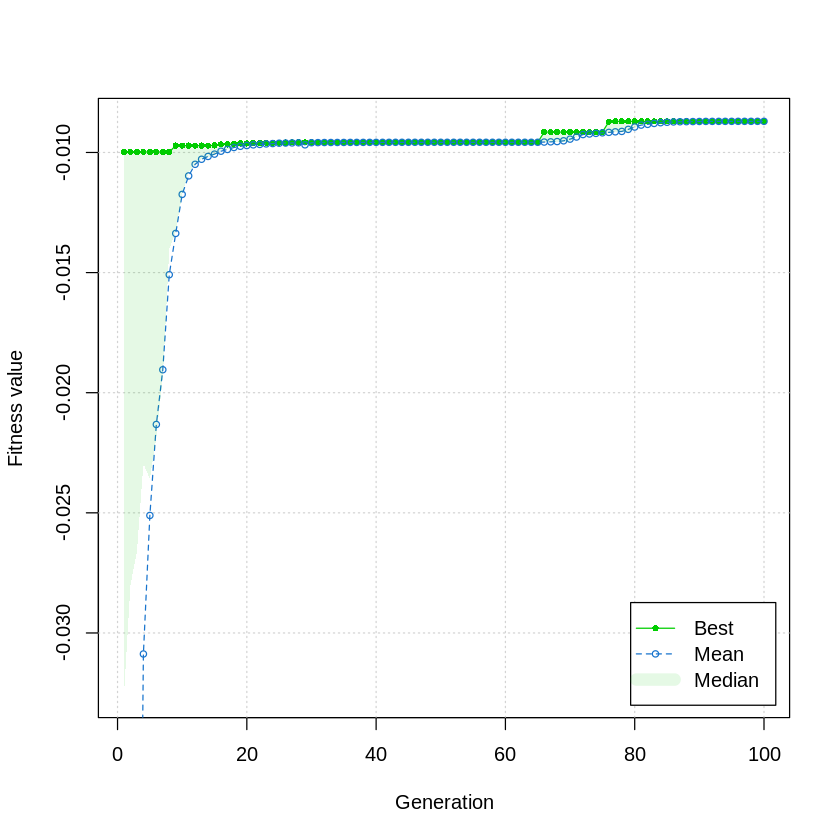

In [221]:
## GA on f2

SGA <- ga(type = "real-valued",
         fitness = function(x) -func2(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Next, with the the weighted function. We will experiment with different weights all adding up to one.

We will first test:


*   a=0.5
*   b=0.5



── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -28.40991 
Solution = 
           x1       x2       x3       x4
[1,] 18.33138 11.82722 1.528983 1.309357

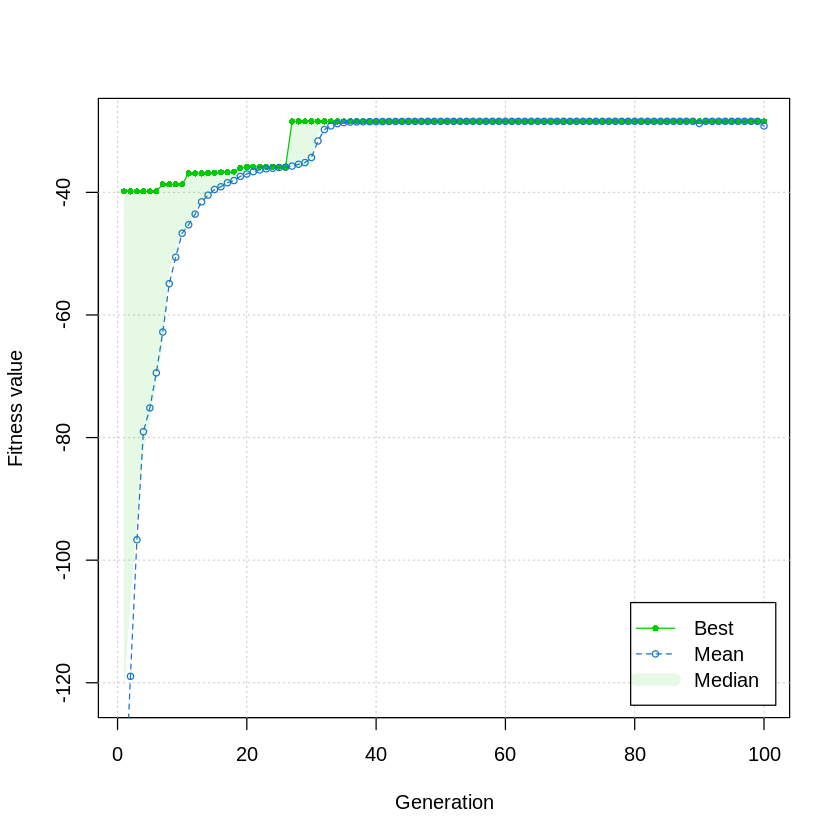

In [232]:
## GA on y

a <- 0.5
b <- 0.5

SGA <- ga(type = "real-valued",
         fitness = function(x) -func3(a, b, x[1], x[2], x[3], x[4], func1, func2),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Next test:


*   a=1
*   b=0



── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -78.92303 
Solution = 
           x1       x2       x3       x4
[1,] 13.94762 15.47975 2.570214 1.668327

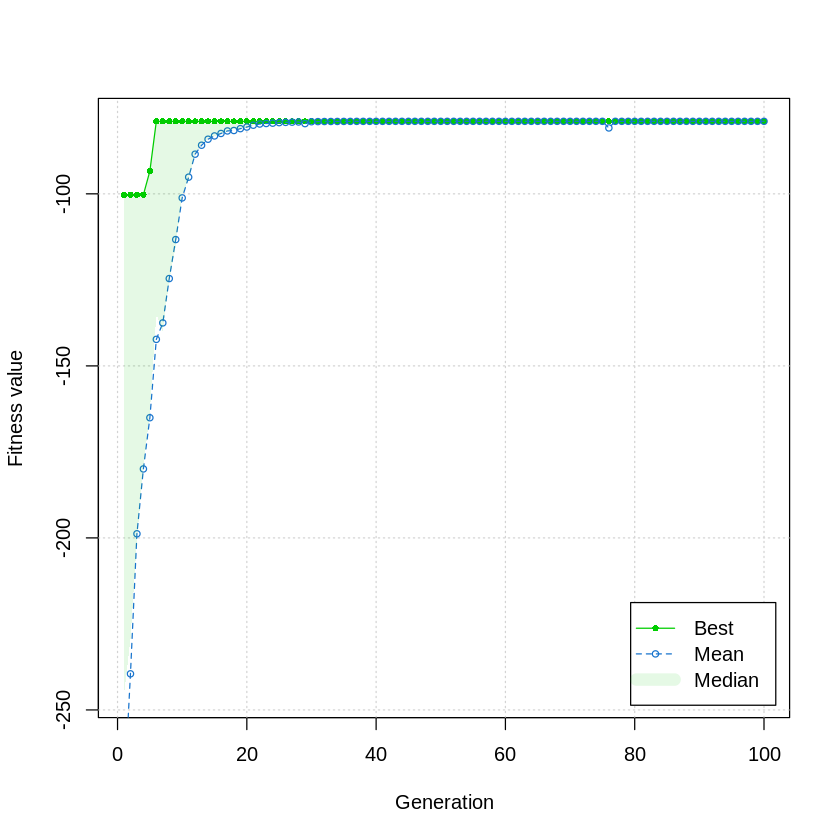

In [233]:
## GA on y

a <- 1
b <- 0

SGA <- ga(type = "real-valued",
         fitness = function(x) -func3(a, b, x[1], x[2], x[3], x[4], func1, func2),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Next test:


*   a=0
*   b=1



── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.007498014 
Solution = 
           x1       x2       x3       x4
[1,] 79.43715 43.20409 3.642775 4.645453

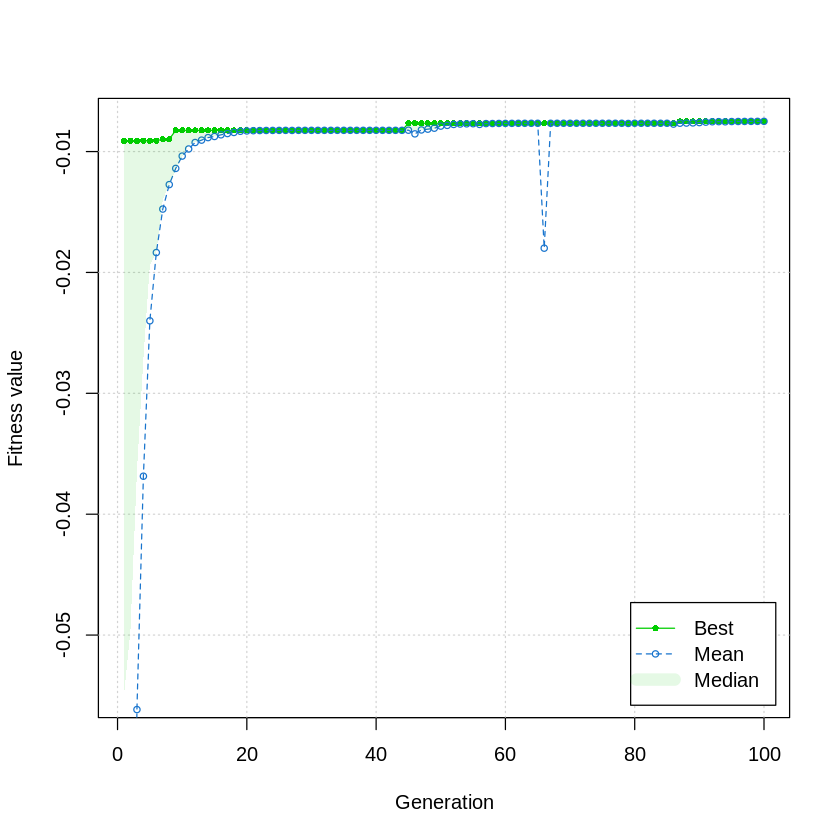

In [234]:
## GA on y

a <- 0
b <- 1

SGA <- ga(type = "real-valued",
         fitness = function(x) -func3(a, b, x[1], x[2], x[3], x[4], func1, func2),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Next test:


*   a=0.1
*   b=0.9



── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -8.836605 
Solution = 
           x1       x2       x3       x4
[1,] 19.08627 14.21021 2.355546 1.340628

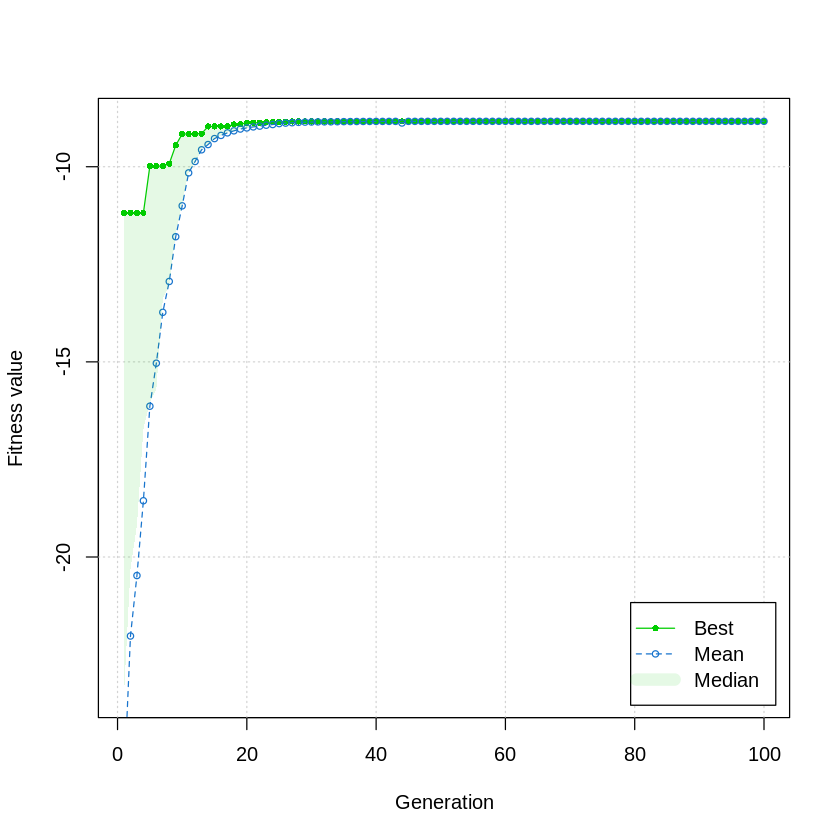

In [235]:
## GA on y

a <- 0.1
b <- 0.9

SGA <- ga(type = "real-valued",
         fitness = function(x) -func3(a, b, x[1], x[2], x[3], x[4], func1, func2),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Next test:


*   a=0.2
*   b=0.8



── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -14.16104 
Solution = 
           x1       x2       x3       x4
[1,] 17.56358 15.32713 1.272906 1.509051

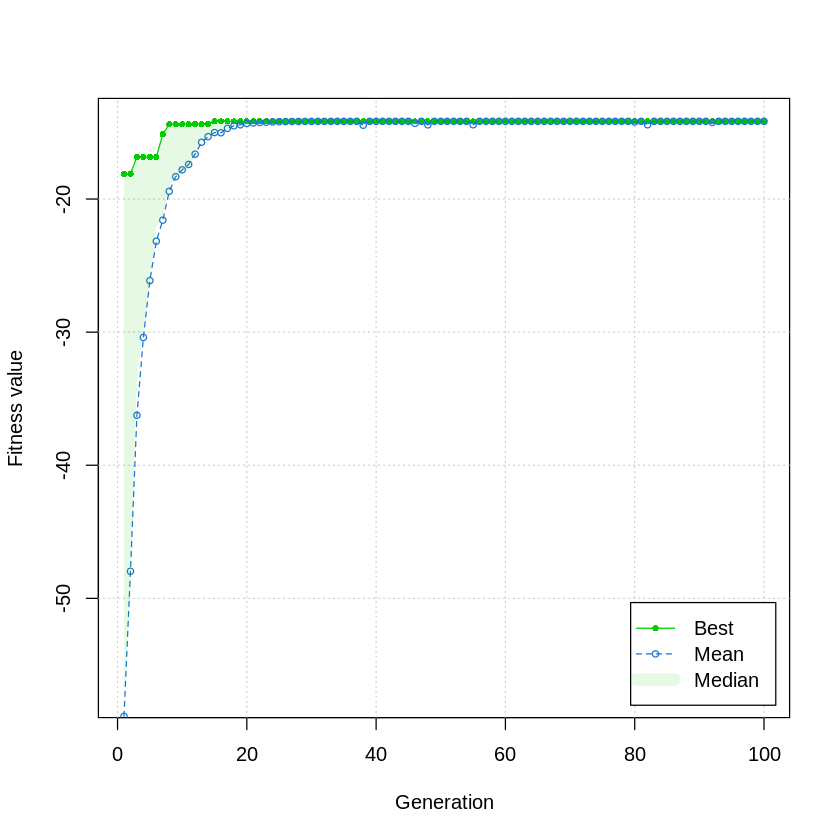

In [236]:
## GA on y

a <- 0.2
b <- 0.8

SGA <- ga(type = "real-valued",
         fitness = function(x) -func3(a, b, x[1], x[2], x[3], x[4], func1, func2),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Next test:


*   a=0.3
*   b=0.7



── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -16.45167 
Solution = 
           x1       x2       x3       x4
[1,] 12.74388 17.00054 1.064478 1.012709

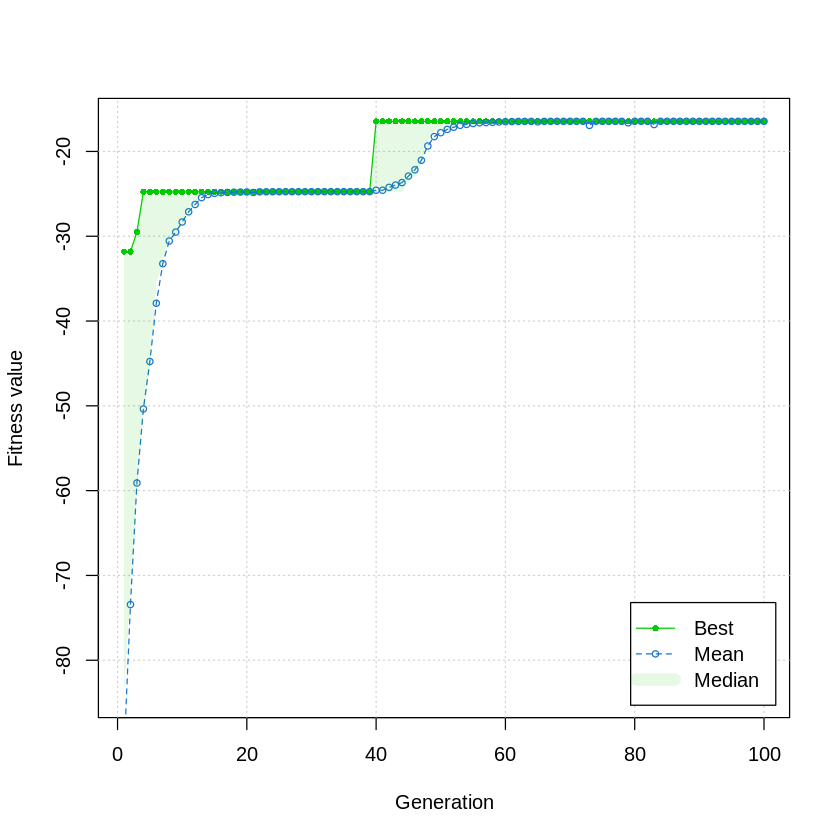

In [237]:
## GA on y

a <- 0.3
b <- 0.7

SGA <- ga(type = "real-valued",
         fitness = function(x) -func3(a, b, x[1], x[2], x[3], x[4], func1, func2),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Next test:


*   a=0.4
*   b=0.6



── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -29.21468 
Solution = 
           x1       x2       x3       x4
[1,] 18.82024 11.33308 2.323953 1.500871

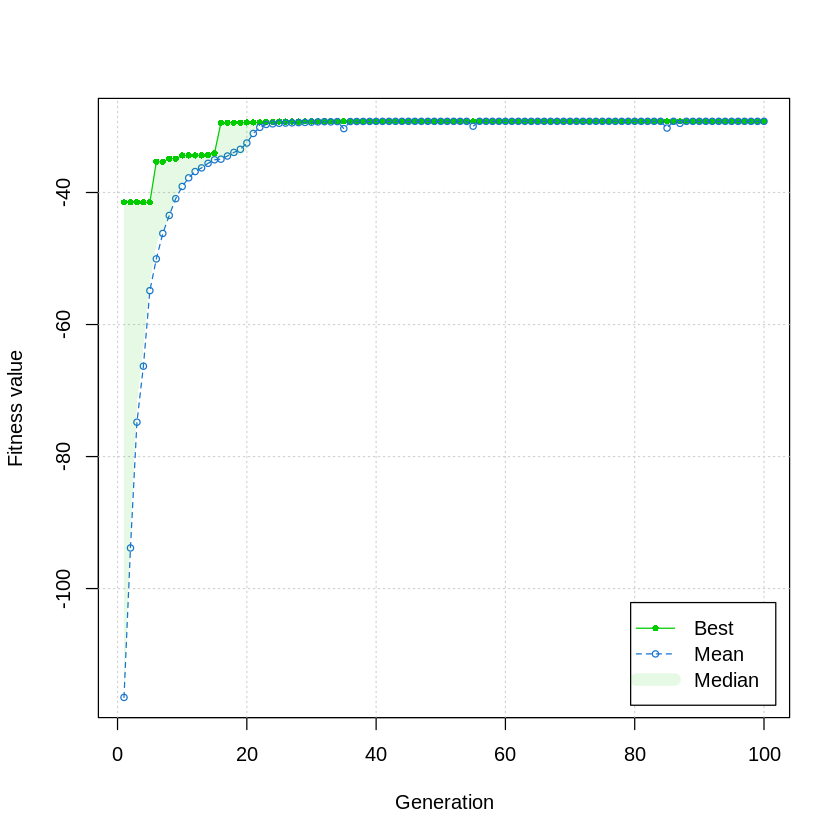

In [238]:
## GA on y

a <- 0.4
b <- 0.6

SGA <- ga(type = "real-valued",
         fitness = function(x) -func3(a, b, x[1], x[2], x[3], x[4], func1, func2),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Next test:


*   a=0.6
*   b=0.4

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -39.39593 
Solution = 
          x1       x2       x3      x4
[1,] 20.3804 14.65394 1.653981 1.19711

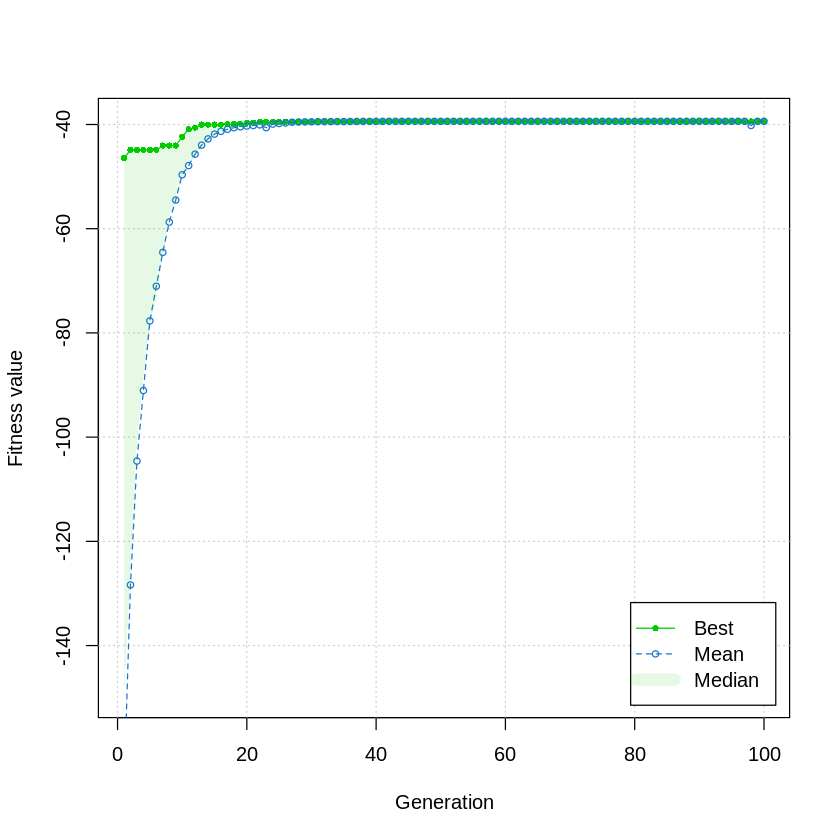

In [239]:
## GA on y

a <- 0.6
b <- 0.4

SGA <- ga(type = "real-valued",
         fitness = function(x) -func3(a, b, x[1], x[2], x[3], x[4], func1, func2),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Next test:


*   a=0.7
*   b=0.3



── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -47.76292 
Solution = 
           x1       x2       x3       x4
[1,] 32.08687 14.07736 1.156406 1.196679

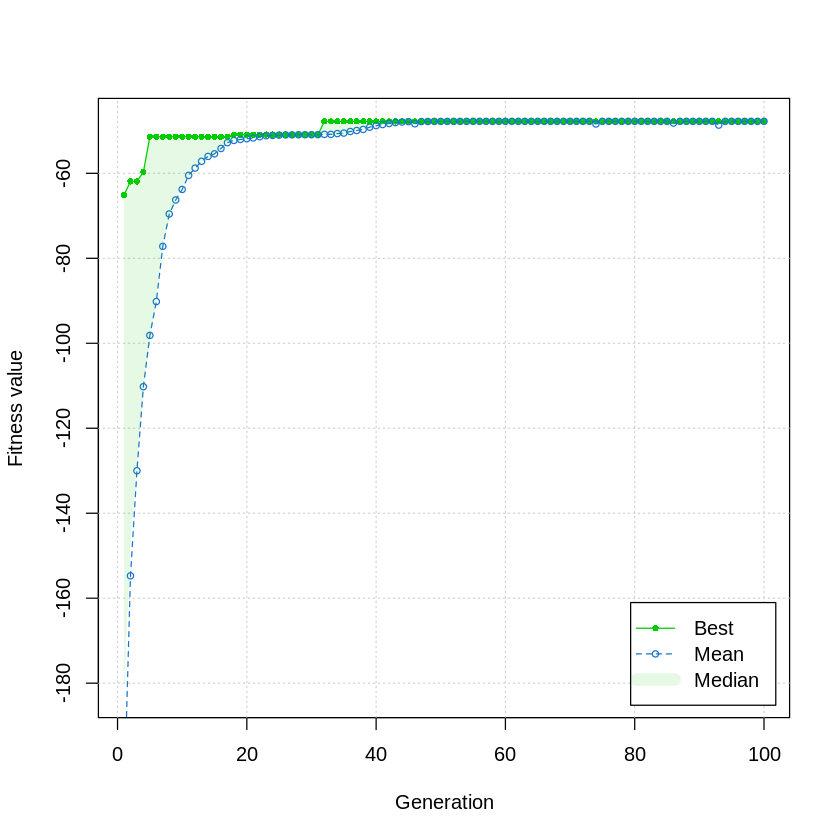

In [240]:
## GA on y

a <- 0.7
b <- 0.3

SGA <- ga(type = "real-valued",
         fitness = function(x) -func3(a, b, x[1], x[2], x[3], x[4], func1, func2),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Next test:


*   a=0.8
*   b=0.2



── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -50.98452 
Solution = 
           x1      x2      x3      x4
[1,] 19.88443 13.9845 1.91359 1.04893

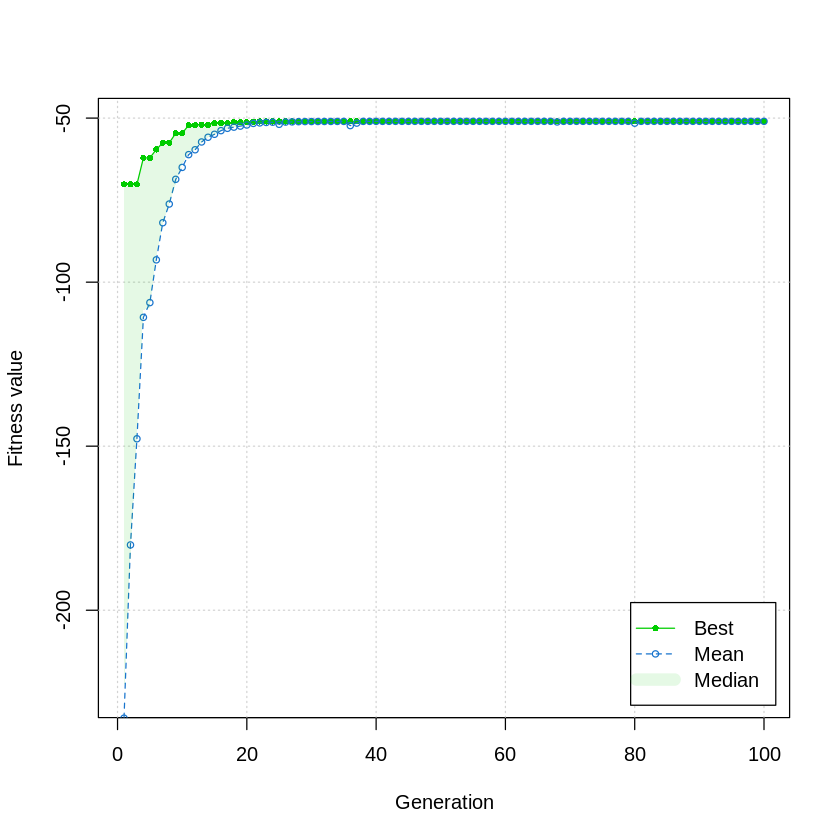

In [241]:
## GA on y

a <- 0.8
b <- 0.2

SGA <- ga(type = "real-valued",
         fitness = function(x) -func3(a, b, x[1], x[2], x[3], x[4], func1, func2),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Next test:


*   a=0.9
*   b=0.1



── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -70.04563 
Solution = 
          x1       x2       x3       x4
[1,] 17.3083 16.91795 1.488753 1.682376

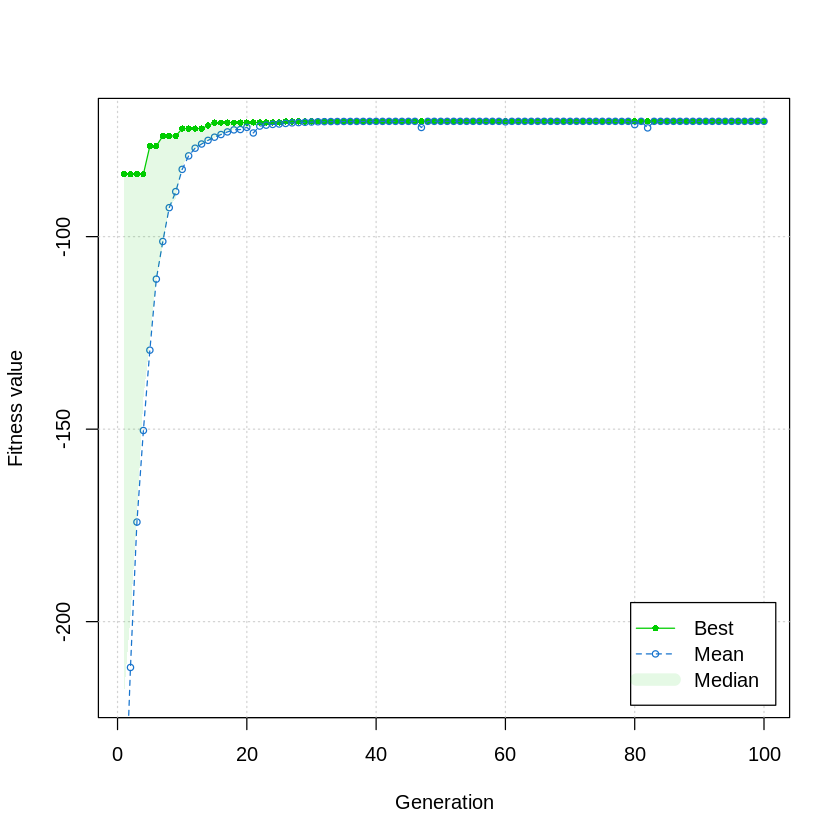

In [242]:
## GA on y

a <- 0.9
b <- 0.1

SGA <- ga(type = "real-valued",
         fitness = function(x) -func3(a, b, x[1], x[2], x[3], x[4], func1, func2),
         lower = c(10, 10, 0.9, 0.9),
         upper = c(80, 50, 5.0, 5.0),
         maxiter = 100,
         popSize = 50,
         pcrossover = 0.75,
         pmutation = 0.001)

summary(SGA)

plot(SGA)

Looking at the results of different a and b values, we can get the following observations:


*   Giving the f2 function a higher weight usually leads the $X^*$ values in the solution of the generation to be closer to their maximums.
*   Giving the f1 function a higher weight usually leads the $X^*$ values in the solution of the generation to be closer to their minimums.
*   The point of convergence between best and average fitness behavior is lower with a higher weight given to the f1 function as well.
*   There seems to be trade-offs between the $X^*$ values between the different weights. For example, in one generation, $x_1$ may be closer to its maximum compared to the other $X^*$ values in the solution. However, in other generations, $x_1$ may get closer to its minimum, but then there would be an increase in $x_2$ or some of the other $X^*$ values in the solution.  